----
CC5201-1 Bases de Datos Multimedia.<br>
Genesis Moraga Azócar <br>           
***

# Tarea 1
***

##Parte I:
####Analizar la distribución de distancias de espacios vectoriales de dimensión 2D, 6D, 10D, y 20D.

Para esto se van a crear 100.000 puntos aleatorios por cada dimensión, donde cada coordenada de un punto es un número aleatorio entre 0 y 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, randint, uniform

In [2]:
#Creación de puntos aleatorios para cada dimensión
p2D=np.random.rand(100000,2)
p6D=np.random.rand(100000,6)
p10D=np.random.rand(100000,10)
p20D=np.random.rand(100000,20)

Luego, por cada dimendión se escogerán 10.000 pares de puntos aleatorios, y por cada par de puntos escogidos se calculará la distancia que tienen según la métrica $L_1$ (Manhattan), $L_2$ (Euclidiana) y $L_{\infty}$ (Chebyshov).

In [ ]:
#10.000 pares de puntos aleatorios escogidos por cada dimension
dL1=np.zeros((4,10000))
dL2=np.zeros((4,10000))
dLinf=np.zeros((4,10000))
for i in range(10000):
   pa=np.random.randint(100000, size=(4,2)) # Escogo un par de puntos para cada dimensión

   #Resta absoluta entre los puntos
   dif2D=np.absolute(p2D[pa[0,0]] - p2D[pa[0,1]])
   dif6D=np.absolute(p6D[pa[1,0]] - p6D[pa[1,1]])
   dif10D=np.absolute(p10D[pa[2,0]] - p10D[pa[2,1]])
   dif20D=np.absolute(p20D[pa[3,0]] - p20D[pa[3,1]])
  
   #Se calcula y se guarda la distancia con L1
   dL1[0][i]=np.sum(dif2D) #agrego la distancia en 2D
   dL1[1][i]=np.sum(dif6D) #agrego la distancia en 6D
   dL1[2][i]=np.sum(dif10D) #agrego la distancia en 10D
   dL1[3][i]=np.sum(dif20D) #agrego la distancia en 20D
   
   #Se calcula y se guarda la distancia con L2
   dL2[0][i]=np.sqrt(np.sum(np.power(dif2D,2)))
   dL2[1][i]=np.sqrt(np.sum(np.power(dif6D,2)))
   dL2[2][i]=np.sqrt(np.sum(np.power(dif10D,2)))
   dL2[3][i]=np.sqrt(np.sum(np.power(dif20D,2)))

   #Se calcula y se guarda la distancia con Linf
   dLinf[0][i]=np.amax(dif2D)
   dLinf[1][i]=np.amax(dif6D)
   dLinf[2][i]=np.amax(dif10D)
   dLinf[3][i]=np.amax(dif20D)

Ahora, se crean 3 gráficos (uno por cada distancia), que contienen los histogramas de las distancias que obtuvimos anteriormente para cada dimensión.

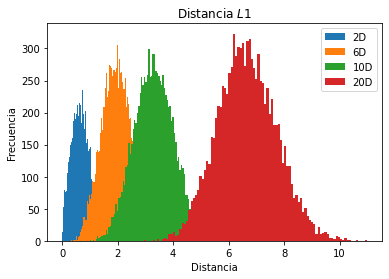

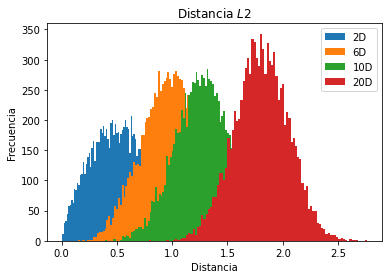

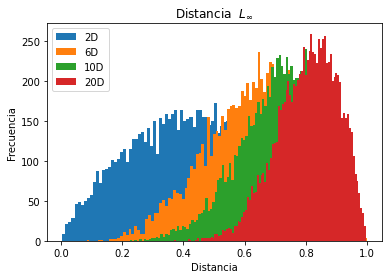

In [ ]:
#Histogramas según la distancia L1

plt.hist(dL1[0], bins=100)
plt.hist(dL1[1], bins=100)
plt.hist(dL1[2], bins=100)
plt.hist(dL1[3], bins=100)

plt.title("Distancia $L1$")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.legend(("2D","6D","10D","20D"))

plt.show()

#Histogramas según la distancia L2

plt.hist(dL2[0], bins=100)
plt.hist(dL2[1], bins=100)
plt.hist(dL2[2], bins=100)
plt.hist(dL2[3], bins=100)

plt.title("Distancia $L2$")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.legend(("2D","6D","10D","20D"))

plt.show()

#Histogramas según la distancia Linf

plt.hist(dLinf[0], bins=100)
plt.hist(dLinf[1], bins=100)
plt.hist(dLinf[2], bins=100)
plt.hist(dLinf[3], bins=100)

plt.title("Distancia  $L_\infty$ ")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.legend(("2D","6D","10D","20D"))

plt.show()

###Análisis de resultados:
En los gráficos se puede observar que cuando la dimensión es más grande el histograma se va corriendo a la derecha, es decir, la media toma valores más grandes y la varianza crece. Esto significa que las distancias aumentan cuando la dimensión es mayor, lo que tiene sentido ya que en el calculo de $L_{1}$ y $L_{2}$ se suman los componentes de un vector de largo igual a la dimensión. Además, en $L_\infty$ se observa un comportamiento parecido pero con distancias mucho menores, lo que se explica con que toma el máximo de valores que estan entre cero y uno, por ende la distancia no puede ser mayor a uno, junto con esto, las distancias tienen mayor probabilidad de ser más grandes si la dimensión es mayor, ya que se eligen más valores aleatorios lo que implica mayor probabilidad de que el máximo aumente.

Por lo tanto, al trabajar con distancias hay que tener bastante consideración con la dimensión que se usa y tener presente como esta afecta el comportamiento de las diferentes métricas.

***

##Parte II:
####Analizar la distribución de distancias Mahalanobis en diferentes espacios vectoriales (6D, 10D y 20D) y comparar con las distancias $L_1$, $L_2$ y $L_{\infty}$. 

Se deben generan 100.000 puntos por cada espacio vectorial, pero con una construcción especial: para cada punto las primeras dos coordenadas se inicializan con el mismo valor aleatorio entre cero y uno, y el resto con el valor cero, luego a todas las coordenadas se le suma un valor aleatorio entre 0 y 0,0001.

In [ ]:
#Se crean 100.000 puntos por cada dimensión donde todas las coordenadas valen cero.
pts6=np.zeros((100000, 6))
pts10=np.zeros((100000, 10))
pts20=np.zeros((100000, 20))

for i in range(100000):

  # En cada dimensión hacemos:
  # *a la primera y segunda coordenada del punto i le damos un valor random.
  # *le sumamos a todas las coordenadas un valor aleatorio entre 0 y 0,001.

  pts6[i,0]=pts6[i,1]=random() 
  for j in range(6):
    pts6[i,j]+=uniform(0, 0.0001) 

  pts10[i,0]=pts10[i,1]=random()
  for j in range(10):
    pts10[i,j]+=uniform(0, 0.0001)

  pts20[i,0]=pts20[i,1]=random()
  for j in range(20):
    pts20[i,j]+=uniform(0, 0.0001)

Luego, se calcula la matriz de covarianza de los puntos por cada dimensión, ya que se necesitará para calcular distancias Mahalanobis.

In [ ]:
#creamos la matriz de covarianza por cada dimensión
cov6=np.cov(pts6.T)
cov10=np.cov(pts10.T)
cov20=np.cov(pts20.T)

Ahora, se debe elegir al azar los 10.000 pares de puntos por cada dimensión, para luego calcular la distancia $L_2$ y Mahalanobis para cada par de puntos.

In [ ]:
#10.000 pares de puntos aleatorios escogidos por cada dimensión
d_L2=np.zeros((3,10000))
d_M=np.zeros((3,10000))

for i in range(10000):
  
   # se escoge un par de puntos aleatorios para cada dimensión
   pa=np.random.randint(100000, size=(3,2))

   #Calculamos la resta de los pares de puntos
   dif6=pts6[pa[0,0]] - pts6[pa[0,1]]
   dif10=pts10[pa[1,0]] - pts10[pa[1,1]]
   dif20=pts20[pa[2,0]] - pts20[pa[2,1]]

   #Se calcula y guarda la distancia con L2
   d_L2[0][i]=np.sqrt(np.sum(np.power(dif6,2)))
   d_L2[1][i]=np.sqrt(np.sum(np.power(dif10,2)))
   d_L2[2][i]=np.sqrt(np.sum(np.power(dif20,2)))

   ##Se calcula y guarda la distancia con Mahalanobis
   d_M[0][i]=np.sqrt(np.dot(dif6.T, np.dot(np.linalg.inv(cov6),dif6)))
   d_M[1][i]=np.sqrt(np.dot(dif10.T, np.dot(np.linalg.inv(cov10), dif10)))
   d_M[2][i]=np.sqrt(np.dot(dif20.T, np.dot(np.linalg.inv(cov20),dif20)))

A continuación, se crean 3 gráficos, uno por cada dimensión, que contienen los histogramas de las distancias calculadas con $L_2$ y Mahalanobis.

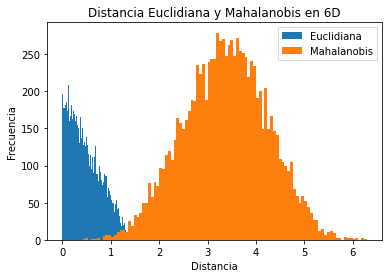

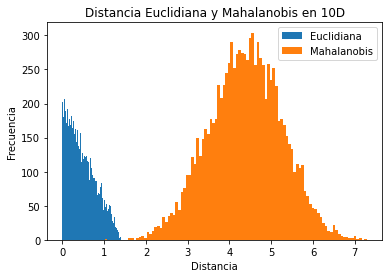

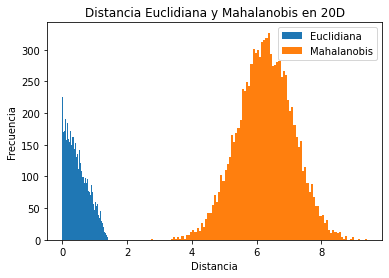

In [ ]:
#Histograma en 6D

plt.hist(d_L2[0], bins=100)
plt.hist(d_M[0], bins=100)

plt.title("Distancia Euclidiana y Mahalanobis en 6D")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.legend(("Euclidiana","Mahalanobis"))

plt.show()

#Histograma en 10D

plt.hist(d_L2[1], bins=100)
plt.hist(d_M[1], bins=100)

plt.title("Distancia Euclidiana y Mahalanobis en 10D")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.legend(("Euclidiana", "Mahalanobis"))

plt.show()

#Histograma en 20D

plt.hist(d_L2[2], bins=100)
plt.hist(d_M[2], bins=100)

plt.title("Distancia Euclidiana y Mahalanobis en 20D")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.legend(("Euclidiana","Mahalanobis"))

plt.show()

###Análisis de resultados:
Se puede observar que los histogramas formados con la distancia Mahalanobis tiene un distribución bastante normalizada. En cambio, con la distancia Euclidiana hay mayor cantidad de distancias pequeñas. Además, al aumentar la dimensión los valores obtenidos de distancia Mahalanobis va creciendo.

Como los puntos dados eran especiales, con las primeras dos coordenadas con un rango más grande de posibles valores, al calcular la distancia $L_2$ ya no hay un histograma normalizado como los de los gráficos de la parte anterior, esto se debe a que el valor de las primeras coordenadas tiene el mismo peso que las otras sin considerar que podian estar en rangos muy distintos.

En cambio, con Mahalanobis se ven histogramas bien distribuidos, pues al usar la covarianza de los datos se le asigna un peso a cada coordenada según como varian los puntos obtenidos.

***